In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
from scipy.special import boxcox1p
import warnings

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.compose import make_column_transformer
from itertools import combinations 

from scipy import stats
from scipy.stats import norm, kurtosis, skew


from house_utils import data_summary, features_profile, plot_feats


# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices

from sklearn.model_selection import StratifiedKFold

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import make_pipeline

warnings.filterwarnings("ignore") # ignoring annoying warnings

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 500)

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 

from sklearn.preprocessing import PolynomialFeatures



###TO PREVENT SCROLLING : SHIFT + O

In [87]:
#Loading of datasets
%store -r train_78
%store -r test_78

train = train_78.copy()
test = test_78.copy()

target = "Loan_Status"

In [88]:
#III. FEATURE ENGINEERING
""""Some ideas
• Aggregations (across groups or dates)
• Ratios (divide)
• Interactions (multiply)
• Frequency (counts)
• Pull parts from dates (months/days/hours)"""

'"Some ideas\n• Aggregations (across groups or dates)\n• Ratios (divide)\n• Interactions (multiply)\n• Frequency (counts)\n• Pull parts from dates (months/days/hours)'

In [89]:
   
# #Gender_married feature
# train["Gender_Married"] = train["Gender"].astype(str) + "_" + train["Married"].astype(str)
# test["Gender_Married"] = test["Gender"].astype(str) + "_" + test["Married"].astype(str)


# # #Gender_Education
# # Gender_Self_Employed
# # Gender_Property_Area
# # Gender_Dependents
#FE_0
train["Gender_Education"] = train["Gender"].astype(str) + "_" + train["Education"].astype(str)
test["Gender_Education"] = test["Gender"].astype(str) + "_" + test["Education"].astype(str)

# train["Gender_Self_Employed"] = train["Gender"].astype(str) + "_" + train["Self_Employed"].astype(str)
# train["Gender_Property_Area"] = train["Gender"].astype(str) + "_" + train["Property_Area"].astype(str)
# train["Gender_Dependents"] = train["Gender"].astype(str) + "_" + train["Dependents"].astype(str)

#FE_1
# #Binning
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very high"]
train["total_income"] = train["ApplicantIncome"] + train["CoapplicantIncome"] 
train["total_income"]=pd.cut(train["total_income"],bins,labels=group).astype(str)
test["total_income"] = test["ApplicantIncome"] + test["CoapplicantIncome"] 
test["total_income"]=pd.cut(test["total_income"],bins,labels=group).astype(str)

# #LoanAmount and Gender
# bins=[0,130,170, 700]
# group=["Low","Average","High"]
# train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group).astype(str)
# train["LoanAmount_Gender"] = train["Gender"].astype(str) + "_" + train["LoanAmount_bin"].astype(str)
# train.drop("LoanAmount_bin", axis = 1, inplace = True)
# #CoapplicantIncome
# bins=[0,1200,2300,42000]
# group=["Low","Average","High"]
# train["Coapplicant_Income_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group).astype(str)

# #LoanAmount
# bins=[0,130,170, 700]
# group=["Low","Average","High"]
# train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group).astype(str)

# #CoapplicantIncome
bins=[0,1200,2300,42000]
group=["Low","Average","High"]
train["Coapplicant_Income_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group).astype(str)
test["Coapplicant_Income_bin"]=pd.cut(test["CoapplicantIncome"],bins,labels=group).astype(str)


# #Frequencies
def freq_count_feat(df):
    
    cat_feats = set(df.select_dtypes(include= object).columns) - set(list(["Loan_ID"]))
    num_feats = df.select_dtypes(exclude= object).columns
    for c in cat_feats:
        df[c +"_"+"freq"] = df.groupby([c])["Loan_ID"].transform("count")
    return df

# #New features
train["Incomes_squared"] = train["ApplicantIncome"] * (train["CoapplicantIncome"] **2)
test["Incomes_squared"] = test["ApplicantIncome"] * (test["CoapplicantIncome"] **2)
# #FE_2
train["coapp_Incomes_squared"] = (train["ApplicantIncome"] + train["CoapplicantIncome"])/(train["LoanAmount"] **2)
test["coapp_Incomes_squared"] = (test["ApplicantIncome"] + test["CoapplicantIncome"])/(test["LoanAmount"] **2)

# #FE_3
train["coapp_Incomes_squared"] = (train["ApplicantIncome"] + train["CoapplicantIncome"])/(train["Loan_Amount_Term"] **2)
test["coapp_Incomes_squared"] = (test["ApplicantIncome"] + test["CoapplicantIncome"])/(test["Loan_Amount_Term"] **2)

# # #FE_4
# train["Term_Amount_squared"] = (train["LoanAmount"]) * (train["Loan_Amount_Term"] **2)
# test["Term_Amount_squared"] = (test["LoanAmount"]) * (test["Loan_Amount_Term"] **2)

# #FE_4
# train["Amount_Coapp_squared"] = (train["LoanAmount"] * train["Loan_Amount_Term"]) / (train["CoapplicantIncome"] **2 + 1)
# test["Amount_Coapp_squared"] = (test["LoanAmount"] * test["Loan_Amount_Term"]) / (test["CoapplicantIncome"] **2 + 1)

train["Amount_history_squared"] = (train["LoanAmount"] / ((train["Credit_History"] + 1)**2))
test["Amount_history_squared"] = (test["LoanAmount"] / ((test["Credit_History"] + 1)**2))

# #FE_5

train["term_income"] = train["Loan_Amount_Term"]/(train["ApplicantIncome"] + train["CoapplicantIncome"]**2)
test["term_income"] = test["Loan_Amount_Term"]/(test["ApplicantIncome"] + test["CoapplicantIncome"]**2)

# #FE_6
train["income*history*squared"] = (train["ApplicantIncome"] * train["CoapplicantIncome"]**2) * ((train["Credit_History"] + 1)**2)
test["income*history*squared"] = (test["ApplicantIncome"] * test["CoapplicantIncome"]**2) * ((test["Credit_History"] + 1)**2)
train["income*history"] = (train["CoapplicantIncome"]) / ((train["Credit_History"] + 1)**2)
test["income*history"] = (test["CoapplicantIncome"]) / ((test["Credit_History"] + 1)**2)
train["Term_Amount_squared"] = (train["LoanAmount"]) / (train["Loan_Amount_Term"] **2)
test["Term_Amount_squared"] = (test["LoanAmount"]) /(test["Loan_Amount_Term"] **2)

train = freq_count_feat(train)
test = freq_count_feat(test)

# ##poLYNOMIALS
# y_train = train.pop(target)
# t = train
# poly_2 = PolynomialFeatures(degree=2, interaction_only=False,
# include_bias=False) #instanciamos
# poly = poly_2.fit_transform(t.select_dtypes(include = "number")) # se crean todos los features nuevo
# col_poly = ["poly" + str(i) for i in range(poly.shape[1])]
# df_poly = pd.DataFrame(poly, columns = col_poly)

# print("Total num features after 2nd order poly creation:", df_poly.shape[1])
# #Get back together with target
# train = pd.concat((y_train, t, df_poly), axis = 1)




Total num features after 2nd order poly creation: 252


In [90]:
train.drop("Loan_ID", axis = 1, inplace = True)
test.drop("Loan_ID", axis = 1, inplace = True)

In [91]:
#IV. DATA TRANSFORMATION
""""Transform Data
• Numerical
      - Normalize or Standardize
      - Log-transform
      - Remove outliers
• Categorical
      - One-hot encode (nominal)
      - Label encoder (ordinal)
      - Binarize (binary)
• Text
      - Tokenize
      - Stem/Lemma
      - TF-IDF
      - (and much more NLP techniques)"""

'"Transform Data\n• Numerical\n      - Normalize or Standardize\n      - Log-transform\n      - Remove outliers\n• Categorical\n      - One-hot encode (nominal)\n      - Label encoder (ordinal)\n      - Binarize (binary)\n• Text\n      - Tokenize\n      - Stem/Lemma\n      - TF-IDF\n      - (and much more NLP techniques)'

In [92]:
#Check datasets
print("Train set columns before transform:", train.columns)
print("Test set columns before transform:", test.columns)

Train set columns before transform: Index(['Loan_Status', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term',
       ...
       'poly242', 'poly243', 'poly244', 'poly245', 'poly246', 'poly247',
       'poly248', 'poly249', 'poly250', 'poly251'],
      dtype='object', length=283)
Test set columns before transform: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Gender_Education', 'total_income', 'Coapplicant_Income_bin',
       'Incomes_squared', 'coapp_Incomes_squared', 'Amount_history_squared',
       'term_income', 'income*history*squared', 'income*history',
       'Term_Amount_squared', 'Gender_Education_freq', 'Married_freq',
       'Gender_freq', 'Education_freq', 'Self_Employed_freq',
       'Coapplicant_Income_bin_freq', 'total

In [93]:
#Data transformation
#NUMERICAL FEATURES TRANSFORMATIONS

#TREATMENT OF SKEWED NUMERICAL FEATURES
def feat_transform(all_data):
    cols = all_data.columns
        #Seleccionamos los numeric features only (usamos cols porque esos son los feats que quedaron)
    numeric_features = all_data.loc[:, list(cols)].dtypes[(all_data.dtypes != "object") & (all_data.dtypes != "uint8")].index
    print(numeric_features)
    # #Calculamos los skewes y los ordenamos...
    skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending =False)

    #Seleccionamos los que tengan un abs(skew) >0.7
    skewed_max = pd.DataFrame({"Skew": skewed_features})
    skewed_max  = skewed_max[abs(skewed_max["Skew"]) > 0.7]
    skewed_max.dropna()

    #Aplicamos ahora la BoxCox transformation
    l_opt = {}
    for f in skewed_max.index:
        all_data[f], l_opt[f] = boxcox((all_data[f] + 1))

    #Checking the results...

    skewed_features_2 = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending =False)
    sk_2 = pd.DataFrame({"Skew_before":skewed_features, "Skew_after": skewed_features_2})
    sk_2 = sk_2[abs(sk_2["Skew_before"]) > 0.7].sort_values(by = "Skew_before", ascending = False)
    print(sk_2)
    return all_data

In [94]:
#Train set 

data_summary(df = train.select_dtypes(include = "number"), target = target)

,Dtype,Uniques,Nulls,% Nulls,Skew,Kurtosis,Correlation
Loan_Status,int64,2,0,0.0000,-0.8100,-1.3480,1.0000
poly114,float64,4,0,0.0000,-1.7160,1.4500,0.5530
poly99,float64,2,0,0.0000,-2.0220,2.0950,0.5410
poly4,float64,2,0,0.0000,-2.0220,2.0950,0.5410
Credit_History,float64,2,0,0.0000,-2.0220,2.0950,0.5410
poly108,float64,3,0,0.0000,-0.9150,-0.4790,0.4980
poly82,float64,11,0,0.0000,-1.4810,0.5690,0.4810
poly113,float64,5,0,0.0000,-1.0080,-0.5530,0.4520
poly110,float64,3,0,0.0000,-0.8920,-1.0440,0.4300
poly111,float64,3,0,0.0000,-1.1340,-0.6730,0.4070


In [95]:
y_transform = train.pop(target)
train_transform = train
y_transform

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [96]:
 train = feat_transform(train_transform)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Incomes_squared',
       'coapp_Incomes_squared', 'Amount_history_squared', 'term_income',
       'income*history*squared',
       ...
       'poly242', 'poly243', 'poly244', 'poly245', 'poly246', 'poly247',
       'poly248', 'poly249', 'poly250', 'poly251'],
      dtype='object', length=273)
                        Skew_before  Skew_after
poly132                24.7176      3.0163     
poly137                24.7151      6.5554     
poly197                24.6952      9.7239     
poly138                24.5017      -0.0355    
poly146                24.4831      -0.0302    
poly139                24.4683      -0.0276    
poly144                24.4126      -0.1037    
poly198                24.4105      0.2339     
poly141                24.3965      -0.0549    
poly140                24.3819      -0.0677    
poly142                24.3335      -0.1269    
poly101                

In [97]:
train = pd.concat((train, y_transform), axis =1)
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       ...
       'poly243', 'poly244', 'poly245', 'poly246', 'poly247', 'poly248',
       'poly249', 'poly250', 'poly251', 'Loan_Status'],
      dtype='object', length=283)

In [98]:

data_summary(df = train.select_dtypes(include = "number"), target = target)

,Dtype,Uniques,Nulls,% Nulls,Skew,Kurtosis,Correlation
Loan_Status,int64,2,0,0.0000,-0.8100,-1.3480,1.0000
poly114,float64,4,0,0.0000,-1.6380,1.2920,0.5520
poly99,float64,2,0,0.0000,-2.0220,2.0950,0.5410
poly4,float64,2,0,0.0000,-2.0220,2.0950,0.5410
Credit_History,float64,2,0,0.0000,-2.0220,2.0950,0.5410
poly108,float64,3,0,0.0000,-1.1100,-0.0250,0.5150
poly82,float64,11,0,0.0000,-1.4980,0.6110,0.4840
poly113,float64,5,0,0.0000,-1.1070,-0.3200,0.4680
poly110,float64,3,0,0.0000,-1.0370,-0.6090,0.4600
poly109,float64,3,0,0.0000,-1.0580,-0.6560,0.4370


In [82]:
# matrix = train.corr()
# f, ax = plt.subplots(figsize = (18,12))
# sns.heatmap(matrix, vmax = 0.8, square = True, cmap = "BuPu", annot = True)

<AxesSubplot:>

Error in callback <function flush_figures at 0x000002066A46F828> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

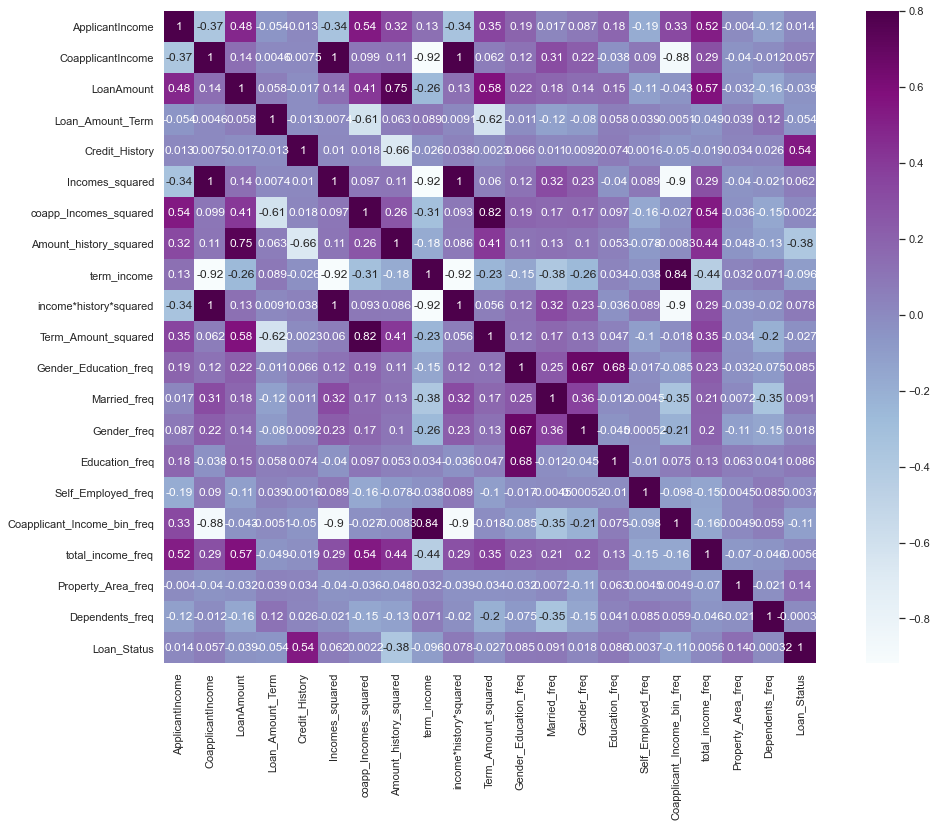

In [48]:
#Testing removal of highly correlated
# train.drop(["income*history"], axis =1, inplace = True)
# test.drop(["income*history"], axis =1, inplace = True)

# train.drop(["Incomes_squared"], axis =1, inplace = True)
# test.drop(["Incomes_squared"], axis =1, inplace = True)

# train.drop(["CoapplicantIncome"], axis =1, inplace = True)


# train.drop(["term_income"], axis =1, inplace = True)


# train.drop(["Amount_Coapp_squared"], axis =1, inplace = True)

matrix = train.corr()
f, ax = plt.subplots(figsize = (18,12))
sns.heatmap(matrix, vmax = 0.8, square = True, cmap = "BuPu", annot = True)


In [83]:
#Test set transformations
for c in test.select_dtypes(include = "number").columns:
    print(c, ":", test[c].skew(), test[c].kurt())

ApplicantIncome : 8.441374954190996 103.12748954245407
CoapplicantIncome : 4.257356934477602 30.191142101153826
LoanAmount : 2.244600521260248 9.588774529299508
Loan_Amount_Term : -2.709536758573826 8.866289165749418
Credit_History : -1.8547214446428353 1.4478521776740618
Incomes_squared : 12.754368332837757 186.91835495182514
coapp_Incomes_squared : 15.253592951972923 243.67617263772345
Amount_history_squared : 2.1210091604749555 4.575181633605672
term_income : 1.2130351162473891 0.6632186839188696
income*history*squared : 12.768438513326519 187.14285506844385
income*history : 10.653439126487513 155.71603440164833
Term_Amount_squared : 14.15075937295567 205.06606189821275
Gender_Education_freq : -0.5418596697721278 -1.6286349674879368
Married_freq : -0.5625816277239133 -1.6927566610747504
Gender_freq : -1.5808087200162273 0.5016603140282188
Education_freq : -1.295987837999873 -0.3222011943510008
Self_Employed_freq : -2.662505409072934 5.116790103639417
Coapplicant_Income_bin_freq : -0

In [50]:
 test = feat_transform( test) 

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Incomes_squared',
       'coapp_Incomes_squared', 'Amount_history_squared', 'term_income',
       'income*history*squared', 'Term_Amount_squared',
       'Gender_Education_freq', 'Married_freq', 'Gender_freq',
       'Education_freq', 'Self_Employed_freq', 'Coapplicant_Income_bin_freq',
       'total_income_freq', 'Property_Area_freq', 'Dependents_freq'],
      dtype='object')
                        Skew_before  Skew_after
coapp_Incomes_squared  15.1912      1.4928     
Term_Amount_squared    14.0929      4.9701     
income*history*squared 12.7162      -0.2236    
Incomes_squared        12.7022      -0.2283    
ApplicantIncome        8.4068       0.6540     
CoapplicantIncome      4.2399       -0.2006    
LoanAmount             2.2354       0.0257     
Amount_history_squared 2.1123       -0.0191    
term_income            1.2081       0.5358     
total_income_freq      -1.2834   

In [51]:
for c in test.select_dtypes(include = "number").columns:
    print(c, ":", test[c].skew(), test[c].kurt())

ApplicantIncome : 0.6567091448811212 10.111684303300967
CoapplicantIncome : -0.20145210955025647 -1.8330806862761448
LoanAmount : 0.025822498260956093 1.7383274908348594
Loan_Amount_Term : 0.3208023633380084 7.848178783843158
Credit_History : -1.8547214446428328 1.4478521776740574
Incomes_squared : -0.22922854484082272 -1.8842913153569651
coapp_Incomes_squared : 1.4988942884769394 1.88461563584173
Amount_history_squared : -0.019204897625439178 0.6133184436252703
term_income : 0.5380389114064689 -1.5391701064047563
income*history*squared : -0.224544637289286 -1.8814130220567484
Term_Amount_squared : 4.9905328554269275 29.002481955295632
Gender_Education_freq : -0.5418596697721278 -1.6286349674879368
Married_freq : -0.5625816277239133 -1.6927566610747504
Gender_freq : -1.5808087200162277 0.5016603140282174
Education_freq : -1.2959878379998722 -0.3222011943510039
Self_Employed_freq : -2.662505409072935 5.116790103639415
Coapplicant_Income_bin_freq : -0.37274140536671324 -1.115287480827694

In [52]:
#RESCALING OF NUMERICAL FEATURES



In [99]:
#OneHotEncoder
def ohe_mae(df, target):
        #Selecciona todas las cols excepto target
    
    if target!= None:
        df_sel = df.loc[:, df.columns != target]
    else:
        df_sel = df

    cat_feats = df_sel.select_dtypes(include= object).columns
    num_feats = df_sel.select_dtypes(exclude= object).columns
    
    print("Cat features to encode:", cat_feats)

    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df = pd.DataFrame(enc.fit_transform(df_sel[cat_feats]).toarray())
    
    print("Number of features onehotencoded:", enc_df.shape[1])
    # Rejoin
    df_sel = df_sel[num_feats].join(enc_df)

    #Get back together with target
    if target!= None:
        df = pd.concat((df[target], df_sel), axis = 1)
    else:
        df = df_sel

    return df
    

# OHE train set
train = ohe_mae(train, target)

# OHE test set
test = ohe_mae(test, target = None)

# ##BINARY ENCODING

# #Import the libraries
# import category_encoders as ce


# #Create object for binary encoding
# encoder= ce.BinaryEncoder(cols = train.select_dtypes(include = "object").columns,return_df=True)

# data_encoded=encoder.fit_transform(train) 
# data_encoded

# def binary_encoding(data, target):
#         #Selecciona todas las cols excepto target
    
#     if target!= None:
#         df_sel = data.loc[:, data.columns != target]
#     else:
#         df_sel = data

#     cat_feats = df_sel.select_dtypes(include= object).columns
#     num_feats = df_sel.select_dtypes(exclude= object).columns
    
#     print("Cat features to encode:", cat_feats)

#     # creating instance of one-hot-encoder
# #    Create object for binary encoding
#     encoder= ce.BinaryEncoder(cols = df_sel[cat_feats].select_dtypes(include = "object").columns,return_df=True)
# #     data_encoded=encoder.fit_transform(train) 
#     # passing bridge-types-cat column (label encoded values of bridge_types)
#     enc_df = pd.DataFrame(encoder.fit_transform(df_sel[cat_feats]))
    
#     print("Number of features binnary encoded:", enc_df.shape[1])
#     # Rejoin
#     df_sel = df_sel[num_feats].join(enc_df)

#     #Get back together with target
#     if target!= None:
#         data= pd.concat((data[target], df_sel), axis = 1)
#     else:
#         data = df_sel

#     return data

# train = binary_encoding(train, target)
# test = binary_encoding(test, target = None)
# train.head()

Cat features to encode: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Gender_Education', 'total_income',
       'Coapplicant_Income_bin'],
      dtype='object')
Number of features onehotencoded: 27
Cat features to encode: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Gender_Education', 'total_income',
       'Coapplicant_Income_bin'],
      dtype='object')
Number of features onehotencoded: 27


In [100]:
train.shape, test.shape

((614, 301), (367, 48))

In [55]:
#FEATURE REMOVALS
# train.drop(["CoapplicantIncome", "ApplicantIncome"], axis = 1, inplace = True)
# test.drop(["CoapplicantIncome", "ApplicantIncome"], axis = 1, inplace = True)


In [56]:
#FEATURE SELECTION TESTING UNIT

#EXHAUSTIVE FEATURE SELECTION
# from mlxtend.feature_selection import  ExhaustiveFeatureSelector

# #Import the algorithm iI want to evaluate my features in
# from sklearn.ensemble import RandomForestClassifier

# #Instatiation
# efs = ExhaustiveFeatureSelector(RandomForestClassifier(),min_features= 4, max_features= 8,
#                                scoring = "accuracy", cv = 2)
t = train.copy()
y = t.pop(target)
X = t

# #Fit
# efs = efs.fit(X,y)

# #Print selected features
# selected_features = X.columns[list(efs.best_idx_)]
# print(selected_features)

# #Print final prediction score
# print(efs.best_score_)



#RANDOM FOREST FEATURE SELECTION
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340, random_state= 42)
model.fit(X,y)
importances = model.feature_importances_
final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
final_df.set_index("Importances").sort_values(by = "Importances", ascending = False)

# final_df.plot.bar(color = "teal")
selected = final_df.sort_values(by = "Importances", ascending = False)[:10]["Features"].values
# final_cols = list(selected) + list([target]) 
# final_cols.remove("CoapplicantIncome")
# final_cols.remove("ApplicantIncome")
print(final_df.set_index("Importances").sort_values(by = "Importances", ascending = False))

                                Features
Importances                             
0.1542       Amount_history_squared     
0.1350       Credit_History             
0.0749       term_income                
0.0734       coapp_Incomes_squared      
0.0654       ApplicantIncome            
0.0653       LoanAmount                 
0.0651       Term_Amount_squared        
0.0367       income*history*squared     
0.0350       CoapplicantIncome          
0.0305       Incomes_squared            
0.0177       Property_Area_freq         
0.0160       Dependents_freq            
0.0142       total_income_freq          
0.0137       Loan_Amount_Term           
0.0108       13                         
0.0102       5                          
0.0102       Gender_Education_freq      
0.0099       Coapplicant_Income_bin_freq
0.0090       4                          
0.0090       12                         
0.0080       Married_freq               
0.0079       3                          
0.0079       14 

In [57]:
selected

array(['Amount_history_squared', 'Credit_History', 'term_income',
       'coapp_Incomes_squared', 'ApplicantIncome', 'LoanAmount',
       'Term_Amount_squared', 'income*history*squared',
       'CoapplicantIncome', 'Incomes_squared'], dtype=object)

In [58]:
#FEATURE REMOVALS
# train.drop(["CoapplicantIncome", "ApplicantIncome"], axis = 1, inplace = True)
# sel_cols =["Amount_history_squared", "Credit_History", "term_income","coapp_Incomes_squared", "LoanAmount",
#            "LoanAmount", "Property_Area_freq", "Dependents_freq", "Loan_Amount_Term"]
# selected

In [59]:
# test = test[selected]
# train = train[list(selected) + list(["Loan_Status"])]

In [101]:
###BASELINE TESTING FOR CHECKING FEATURES

#Baseline
dt = DecisionTreeClassifier(random_state = 42)
scl = StandardScaler()
pipeline = make_pipeline(StandardScaler(), dt)
# final_cols = list(num) + list(["Loan_Status"])
# t = train[final_cols].copy()
t = train.copy()
y = t.pop(target)
X = t
scoring ="roc_auc"
# X = t.drop("Loan_ID", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

kfold = StratifiedKFold(n_splits= 10) 
cv_results = cross_val_score(estimator = pipeline, X= X_train , y = y_train , scoring = scoring, cv = kfold)
print("Score:", cv_results.mean())
print("Std_Error:", cv_results.std()) 
      

Score: 0.6442717086834734
Std_Error: 0.05862462871334787


In [102]:
from catboost import CatBoostClassifier
#Baseline
cb = CatBoostClassifier(random_state = 42, verbose = 0)
scl = StandardScaler()
pipeline = make_pipeline(StandardScaler(), cb)
# final_cols = list(num) + list(["Loan_Status"])
# t = train[final_cols].copy()
t = train.copy()
y = t.pop(target)
X = t
scoring ="roc_auc"
# X = t.drop("Loan_ID", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

kfold = StratifiedKFold(n_splits= 10) 
cv_results = cross_val_score(estimator = pipeline, X= X_train , y = y_train , scoring = scoring, cv = kfold)
print("Score:", cv_results.mean())
print("Std_Error:", cv_results.std()) 
      


Score: 0.7887106842737095
Std_Error: 0.07310482942417372


In [62]:
# lr = LogisticRegression(random_state = 42)
# scl = StandardScaler()

# pipeline = make_pipeline(StandardScaler(), lr)
# # final_cols = list(num) + list(["Loan_Status"])
# # t = train[final_cols].copy()
# t = train[['Amount_history_squared', 'Credit_History','term_income', "coapp_Incomes_squared","ApplicantIncome","Loan_Status"]].copy()
# y = t.pop(target)
# X = t
# scoring ="roc_auc"
# # X = t.drop("Loan_ID", axis =1)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# kfold = StratifiedKFold(n_splits= 10) 
# cv_results = cross_val_score(estimator = pipeline, X= X_train , y = y_train , scoring = scoring, cv = kfold)
# print("Score:", cv_results.mean())
# print("Std_Error:", cv_results.std())


In [63]:
train[['Amount_history_squared', 'Credit_History','term_income', "coapp_Incomes_squared","ApplicantIncome","Loan_Status"]].to_csv("new_train_final.csv", index = False)
test[['Amount_history_squared', 'Credit_History','term_income', "coapp_Incomes_squared","ApplicantIncome"]].to_csv("new_test_final.csv", index = False)

In [64]:
# dt = RandomForestClassifier(random_state = 42)
# scl = StandardScaler()
# pipeline = make_pipeline(StandardScaler(), dt)
# # final_cols = list(num) + list(["Loan_Status"])
# # t = train[final_cols].copy()
# t = train[['Amount_history_squared', 'Credit_History','term_income', "coapp_Incomes_squared", "Loan_Status"]].copy()
# y = t.pop(target)
# X = t
# scoring ="roc_auc"
# # X = t.drop("Loan_ID", axis =1)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# kfold = StratifiedKFold(n_splits= 10) 
# cv_results = cross_val_score(estimator = pipeline, X= X_train , y = y_train , scoring = scoring, cv = kfold)
# print("Score:", cv_results.mean())
# print("Std_Error:", cv_results.std()) 

In [65]:
#Best: FE_5 with [:15] features 0.769755

In [66]:
# # #Baseline
# dt = DecisionTreeClassifier(random_state = 42)
# scl = StandardScaler()
# pipeline = make_pipeline(StandardScaler(), dt)
# # final_cols = list(num) + list(["Loan_Status"])
# # t = train[final_cols].copy()
# t = train.copy()
# y = t.pop(target)
# X = t
# scoring ="roc_auc"
# # X = t.drop("Loan_ID", axis =1)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# kfold = StratifiedKFold(n_splits= 10)
# dict = []
# for i in range(1, len(train.loc[:,train.columns!=target].columns) - 1):
#     sel_col = final_df.sort_values(by = "Importances", ascending = False)[:i]["Features"].values
#     cv_results = cross_val_score(estimator = pipeline, X= X_train[sel_col] , y = y_train , scoring = scoring, cv = kfold)
# #     print("Num selected:", i)
# #     print("Score:", cv_results.mean())
# #     print("Std_Error:", cv_results.std())
#     dict.append((i,cv_results.mean()))
# maximo = 0
# i_max = 0
# for i in range(len(dict)):
#     if dict[i][1] > maximo:
#         maximo = dict[i][1]
#         i_max = i
# print(i_max, maximo)
    